# ETAP 1

Pierwszy zbiór
lb wierszy: 70000
   0    1    2    3    4    5    6    7    8    9    ...  776  777  778  779  \
0    0    8  220  220  220  220  220  220  220  220  ...  220  220  220  220   
1    0    8  235  235  235  235  235  235  235  235  ...  235  235  235  235   
2    0    0    5    5    5    5    5    5    5    5  ...    5    5    5    5   
3    0    3   49   49   49   49   49   49   49   49  ...   49   49   49   49   
4    0    6   56   56   56   56   56   56   56   56  ...   56   56   56   56   

   780  781  782  783  784  785  
0  220  220  220  220  220  220  
1  235  235  235  235  235  235  
2    5    5    5    5    5    5  
3   49   49   49   49   49   49  
4   56   56   56   56   56   56  

[5 rows x 786 columns]
                0             1             2             3             4    \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.857143      3.647971    127.947400    127.947400    127.947400   
std        0.349930  

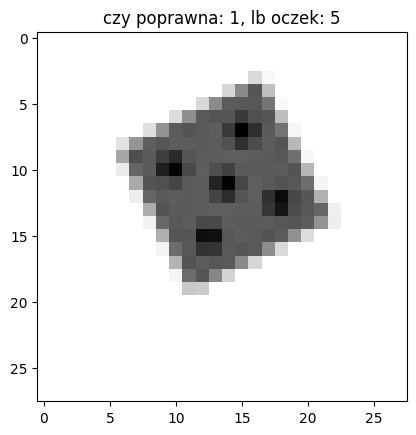

lb kostek niepoprawnych: 10000
lb kostek poprawnych z kazda liczba:
1
1    10000
2    10000
3    10000
4    10000
5    10000
6    10000
Name: count, dtype: int64
lb kolum majaca informacje o kolorach piskeli: 784


Drugi zbior danych
lb wierszy w emnist_letters.csv: 124800
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   23    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2   16    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3   15    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4   23    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
                0

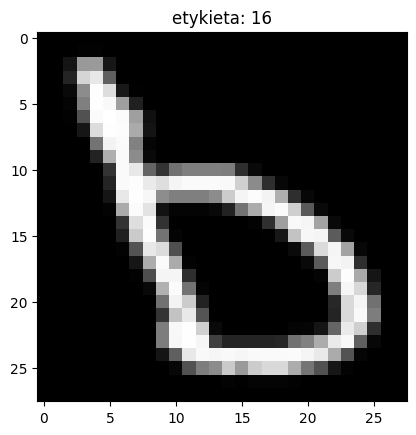

lb kolum majaca informacje o kolorach piskeli: 784


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Pierwszy zbiór")
df = pd.read_csv('dice_ext.csv', header=None)
total_rows = df.shape[0]
print(f'lb wierszy: {total_rows}')
print(df.head())

print(df.describe())

index = 120326 % total_rows
print('index:',index)
label = df.iloc[index, :2].values
pixels = df.iloc[index, 2:].values.reshape(28, 28)
#img
plt.imshow(pixels, cmap='gray')
plt.title(f'czy poprawna: {label[0]}, lb oczek: {label[1]}')
plt.show()

count_label_0 = (df.iloc[:, 0] == 0).sum()
print(f'lb kostek niepoprawnych: {count_label_0}')
count_label_1 = df[df.iloc[:, 0] == 1].iloc[:, 1].value_counts().sort_index()
print("lb kostek poprawnych z kazda liczba:")
print(count_label_1)

num_pixel_columns = df.shape[1] - 2
print(f'lb kolum majaca informacje o kolorach piskeli: {num_pixel_columns}')

# drugi plik
emnist_df = pd.read_csv('emnist_letters.csv', header=None)
total_rows_emnist = emnist_df.shape[0]
print('\n\nDrugi zbior danych')
print(f'lb wierszy w emnist_letters.csv: {total_rows_emnist}')
print(emnist_df.head())
print(emnist_df.describe())

index = 120326 % total_rows_emnist
label = emnist_df.iloc[index, 0]
pixels = emnist_df.iloc[index, 1:].values.reshape(28, 28)
#img
plt.imshow(pixels, cmap='gray')
plt.title(f'etykieta: {label}')
plt.show()

num_pixel_columns_emnist = emnist_df.shape[1] - 1
print(f'lb kolum majaca informacje o kolorach piskeli: {num_pixel_columns_emnist}')


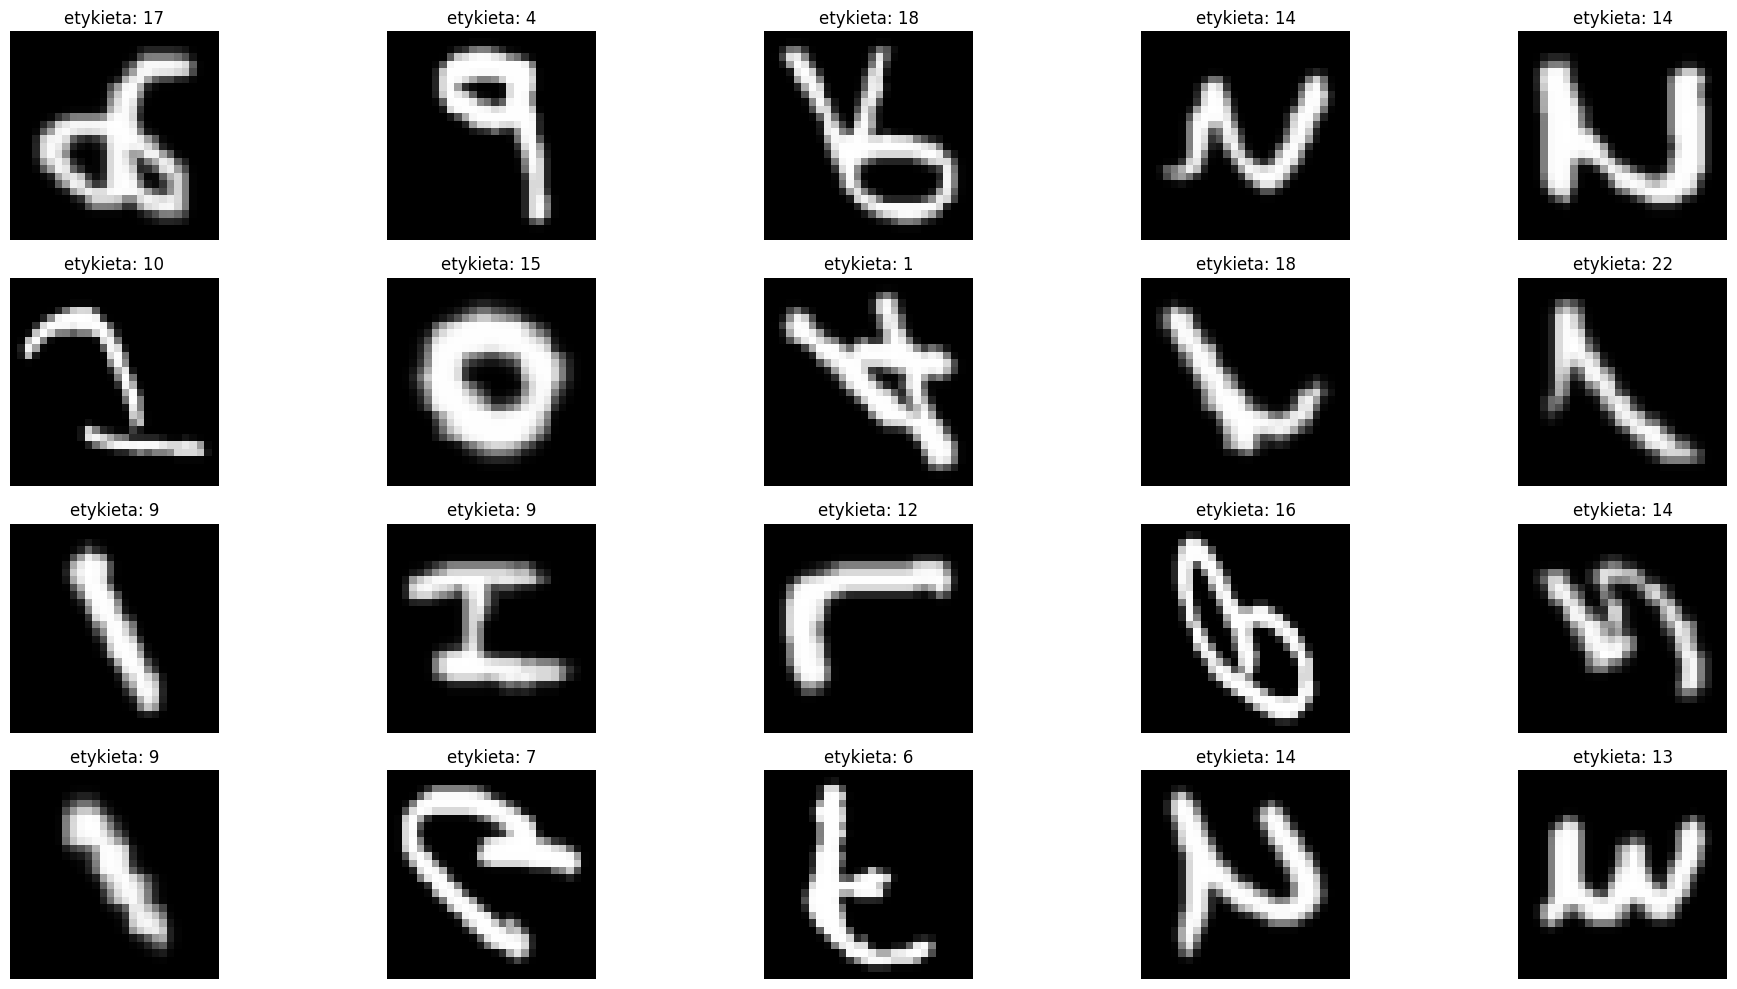

In [5]:
import random
#20 zdjec
random_indices = random.sample(range(len(emnist_df)), min(20, len(emnist_df)))
fig, axes = plt.subplots(4, 5, figsize=(20, 10))
axes = axes.ravel()

for i, index in enumerate(random_indices):
    label = emnist_df.iloc[index, 0]
    image_data = emnist_df.iloc[index, 1:].values.reshape(28, 28)

    axes[i].imshow(image_data, cmap="gray")
    axes[i].set_title(f"etykieta: {label}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()


# ETAP 2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device: {device}")

# wczytanie danych danych
df = pd.read_csv("dice_ext.csv", header=None)
y_valid = df.iloc[:, 0].values.astype(np.int64)
y_dots = df.iloc[:, 1].values.astype(np.int64)
X = df.iloc[:, 2:].values.astype(np.float32).reshape(-1, 1, 28, 28)
X = (X - X.mean()) / X.std() #normalizacja wejscia

tensor_X = torch.tensor(X)
tensor_y_valid = torch.tensor(y_valid)
tensor_y_dots = torch.tensor(y_dots)

dataset = TensorDataset(tensor_X, tensor_y_valid, tensor_y_dots)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

device: cuda


device: cuda
Epoch 1: Valid Acc: 96.97%, Dice Acc: 41.40%, Loss Valid: 0.0839, Loss Dots: 1.3122
Epoch 2: Valid Acc: 99.44%, Dice Acc: 63.75%, Loss Valid: 0.0191, Loss Dots: 0.8102
Epoch 3: Valid Acc: 99.61%, Dice Acc: 75.61%, Loss Valid: 0.0134, Loss Dots: 0.5934
Epoch 4: Valid Acc: 99.72%, Dice Acc: 83.32%, Loss Valid: 0.0101, Loss Dots: 0.4380
Epoch 5: Valid Acc: 99.64%, Dice Acc: 87.93%, Loss Valid: 0.0110, Loss Dots: 0.3342
Epoch 6: Valid Acc: 99.87%, Dice Acc: 91.00%, Loss Valid: 0.0054, Loss Dots: 0.2622
Epoch 7: Valid Acc: 99.73%, Dice Acc: 93.16%, Loss Valid: 0.0091, Loss Dots: 0.2093
Epoch 8: Valid Acc: 99.79%, Dice Acc: 94.72%, Loss Valid: 0.0074, Loss Dots: 0.1636
Epoch 9: Valid Acc: 99.75%, Dice Acc: 95.80%, Loss Valid: 0.0086, Loss Dots: 0.1337
Epoch 10: Valid Acc: 99.81%, Dice Acc: 96.49%, Loss Valid: 0.0057, Loss Dots: 0.1112
Epoch 11: Valid Acc: 99.88%, Dice Acc: 97.05%, Loss Valid: 0.0040, Loss Dots: 0.0949
Epoch 12: Valid Acc: 99.80%, Dice Acc: 97.28%, Loss Valid: 0.

C:\Users\fi115\AppData\Local\Temp\ipykernel_4780\3561332581.py:136: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  validity_model.load_state_dict(torch.load("best_validity_mo


Test Accuracy - Valid: 99.69%
Test Accuracy - Dice: 98.32%
Test Loss - Validity: 0.0112
Test Loss - Dice: 0.0477


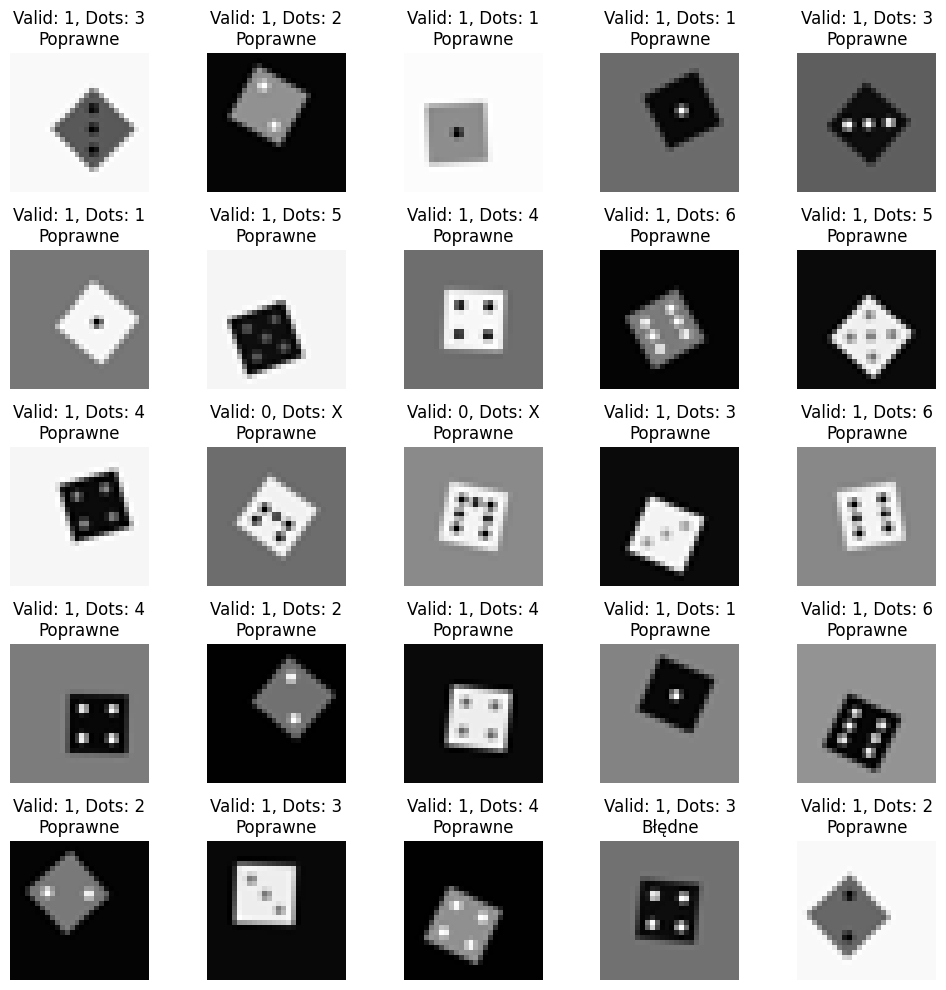

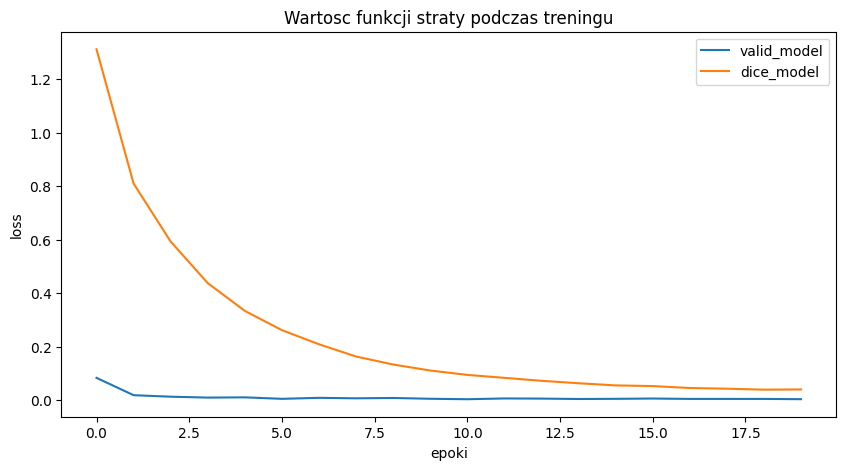

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device: {device}")

# wczytanie danych danych
df = pd.read_csv("dice_ext.csv", header=None)
y_valid = df.iloc[:, 0].values.astype(np.int64)
y_dots = df.iloc[:, 1].values.astype(np.int64)
X = df.iloc[:, 2:].values.astype(np.float32).reshape(-1, 1, 28, 28)
X = (X - X.mean()) / X.std() #normalizacja wejscia

tensor_X = torch.tensor(X)
tensor_y_valid = torch.tensor(y_valid)
tensor_y_dots = torch.tensor(y_dots)

dataset = TensorDataset(tensor_X, tensor_y_valid, tensor_y_dots)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# modele
validity_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 2)
).to(device)

class dice_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(8 * 7 * 7, 32),
            nn.ReLU(),
            nn.Linear(32, 6)
        )
    def forward(self, x):
        return self.net(x)
dice_model = dice_model().to(device)

# fn straty i optymalizatory
criterion = nn.CrossEntropyLoss()
optimizer_validity = optim.Adam(validity_model.parameters(), lr=0.001)
optimizer_dots = optim.Adam(dice_model.parameters(), lr=0.001)

# trening
epochs = 20
losses_valid = [] # zmienne pomocnicze do wizualizacji
losses_dots = []

best_valid_acc = 0.0
best_dice_acc = 0.0
best_validity_state = None
best_dice_state = None

for epoch in range(epochs):
    validity_model.train() # włączenie trybu treningowego
    dice_model.train()
    total_valid, total_dots = 0, 0
    correct_valid, correct_dots = 0, 0
    loss_valid_total, loss_dots_total = 0.0, 0.0

    for batch_X, batch_y_valid, batch_y_dots in train_loader: # iteracja po partiach danych
        batch_X = batch_X.to(device)
        batch_y_valid = batch_y_valid.to(device)
        batch_y_dots = batch_y_dots.to(device)

        out_valid = validity_model(batch_X.view(batch_X.size(0), -1)) # spłaszczenie obrazów do wektorów
        loss_valid = criterion(out_valid, batch_y_valid) #obliczneie straty
        optimizer_validity.zero_grad()
        loss_valid.backward()
        optimizer_validity.step()
        loss_valid_total += loss_valid.item()

        preds_valid = out_valid.argmax(dim=1)
        correct_valid += (preds_valid == batch_y_valid).sum().item()
        total_valid += batch_y_valid.size(0)

        mask = batch_y_valid == 1
        if mask.sum() > 0: # sprawdzenie czy w partii są kostki poprawne
            out_dots = dice_model(batch_X[mask])
            loss_dots = criterion(out_dots, batch_y_dots[mask] - 1)
            optimizer_dots.zero_grad()
            loss_dots.backward()
            optimizer_dots.step()
            loss_dots_total += loss_dots.item()

            preds_dots = out_dots.argmax(dim=1)
            correct_dots += (preds_dots == (batch_y_dots[mask] - 1)).sum().item()
            total_dots += mask.sum().item()

    acc_valid = 100 * correct_valid / total_valid #obliczanie dokładności
    acc_dots = 100 * correct_dots / total_dots if total_dots > 0 else 0

    losses_valid.append(loss_valid_total / len(train_loader))   # dodanie wartości straty do listy potrzebnej do wykresu
    losses_dots.append(loss_dots_total / len(train_loader))

    print(f"Epoch {epoch+1}: Valid Acc: {acc_valid:.2f}%, Dice Acc: {acc_dots:.2f}%, "
          f"Loss Valid: {loss_valid_total / len(train_loader):.4f}, "
          f"Loss Dots: {loss_dots_total / len(train_loader):.4f}")

    if acc_valid > best_valid_acc:  # zapisywanie najlepszego modelu
        best_valid_acc = acc_valid
        best_validity_state = validity_model.state_dict()
    if acc_dots > best_dice_acc:
        best_dice_acc = acc_dots
        best_dice_state = dice_model.state_dict()

print("\nNajlepszy model VALIDITY:")
print(f"  Accuracy: {best_valid_acc:.2f}%")
print("\nNajlepszy model DICE:")
print(f"  Accuracy: {best_dice_acc:.2f}%")

torch.save(best_validity_state, "best_validity_model.pth") # zapisanie wag najlepszego modelu do pliku
torch.save(best_dice_state, "best_dice_model.pth")

# sprawdzanie na danych treningowych
validity_model.load_state_dict(torch.load("best_validity_model.pth"))
dice_model.load_state_dict(torch.load("best_dice_model.pth"))
validity_model.eval() # włączenie trybu produkcji
dice_model.eval()

total_valid_test, total_dots_test = 0, 0
correct_valid_test, correct_dots_test = 0, 0
loss_valid_test_total, loss_dots_test_total = 0.0, 0.0

with torch.no_grad():
    for batch_X, batch_y_valid, batch_y_dots in test_loader:
        batch_X = batch_X.to(device)
        batch_y_valid = batch_y_valid.to(device)
        batch_y_dots = batch_y_dots.to(device)

        out_valid = validity_model(batch_X.view(batch_X.size(0), -1))
        loss_valid = criterion(out_valid, batch_y_valid)
        loss_valid_test_total += loss_valid.item()

        preds_valid = out_valid.argmax(dim=1)
        correct_valid_test += (preds_valid == batch_y_valid).sum().item()
        total_valid_test += batch_y_valid.size(0)

        mask = batch_y_valid == 1
        if mask.sum() > 0:
            out_dots = dice_model(batch_X[mask])
            loss_dots = criterion(out_dots, batch_y_dots[mask] - 1)
            loss_dots_test_total += loss_dots.item()

            preds_dots = out_dots.argmax(dim=1)
            correct_dots_test += (preds_dots == (batch_y_dots[mask] - 1)).sum().item()
            total_dots_test += mask.sum().item()

acc_valid_test = 100 * correct_valid_test / total_valid_test
acc_dots_test = 100 * correct_dots_test / total_dots_test if total_dots_test > 0 else 0

print(f"\nTest Accuracy - Valid: {acc_valid_test:.2f}%")
print(f"Test Accuracy - Dice: {acc_dots_test:.2f}%")
print(f"Test Loss - Validity: {loss_valid_test_total / len(test_loader):.4f}") # średnia straty na zbiorze testowym
print(f"Test Loss - Dice: {loss_dots_test_total / len(test_loader):.4f}")

# przedstawienie wyników na zdjeciach testowych
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()

with torch.no_grad():
    random_indices = random.sample(range(len(test_dataset)), 25) # 25 losowych zdjec ze zbioru trneningowego
    for i, index in enumerate(random_indices):
        x, yv, yd = test_dataset[index]
        x_input = x.unsqueeze(0).to(device)

        out_valid = validity_model(x_input.view(1, -1))
        pred_valid = out_valid.argmax(dim=1).item()

        if pred_valid == 1:
            out_dots = dice_model(x_input)
            pred_dots = out_dots.argmax(dim=1).item() + 1
        else:
            pred_dots = "X"

        # sprawdzanie czy predykcja jest poprawna
        valid_correct = (pred_valid == yv.item())
        dots_correct = (pred_dots == yd.item()) if pred_valid == 1 else True

        # ionfrmacja o poporawnosci
        if valid_correct and dots_correct:
            pred_status = "Poprawne"
        else:
            pred_status = "Błędne"
        # wyswietlenie
        axes[i].imshow(x.squeeze(0), cmap='gray')
        axes[i].set_title(f"Valid: {pred_valid}, Dots: {pred_dots}\n{pred_status}")
        axes[i].axis('off')
plt.tight_layout()
plt.show()

# wykresy strat
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), losses_valid, label='valid_model')
plt.plot(range(epochs), losses_dots, label='dice_model')
plt.xlabel('epoki')
plt.ylabel('loss')
plt.title('Wartosc funkcji straty podczas treningu')
plt.legend()
plt.show()

# ETAP 3

In [29]:
import torch
from torch.utils.data import DataLoader, random_split, TensorDataset, ConcatDataset
import pandas as pd
import numpy as np
import torch.nn as nn

if torch.backends.mps.is_available():     
    device = torch.device("mps")  
    print("device: Apple GPU with Metal backend.")     
else:     
    device = torch.device("cpu")      
    print("device: CPU.")   

dice_df = pd.read_csv('dice_ext.csv', header=None)
letters_df = pd.read_csv('emnist_letters.csv', header=None)

# funkcja do przygotowania datasetow
def csv_to_dataset(df, label):
    label_num = 2 if df.shape[1] == 786 else 1
    img = df.iloc[:, label_num:].values.astype(np.float32).reshape(-1, 1, 28, 28)
    img = img / 255.0
    label = np.full((len(img),), label, dtype=np.int64)
    return TensorDataset(torch.tensor(img), torch.tensor(label))

# przygotowanie datasetów
dice_dataset = csv_to_dataset(dice_df, label=0)
letters_dataset = csv_to_dataset(letters_df, label=1)

# połączenie datasetów
full_dataset = ConcatDataset([dice_dataset, letters_dataset])

# podzial na zbiór treningowy i testowy
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128)

print(f"treningowy: {len(train_dataset)} img")
print(f"testowy: {len(test_dataset)} img")


device: Apple GPU with Metal backend.
treningowy: 155840 img
testowy: 38960 img


In [24]:
class DomainClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 8, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 4, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(4 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 2)  # 2 klasy: dice_ext, emnist_letters
        )

    def forward(self, x):
        return self.net(x)
    

In [39]:
model = DomainClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("device: ",device)
epochs = 10

losses = []
best_acc = 0.0
best_model_state = None

for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    avg_loss = total_loss / len(train_loader)
    acc = 100 * correct / total
    losses.append(avg_loss)

    print(f"epoch {epoch+1}/{epochs}, loss: {avg_loss:.4f}, acc: {acc:.2f}%")

    if acc > best_acc:
        best_acc = acc
        best_model_state = model.state_dict()
# zapisanie najlepszego modelu
torch.save(best_model_state, 'best_model.pth')

device:  mps
epoch 1/10, loss: 0.0251, acc: 98.91%
epoch 2/10, loss: 0.0019, acc: 99.93%
epoch 3/10, loss: 0.0010, acc: 99.97%
epoch 4/10, loss: 0.0006, acc: 99.98%
epoch 5/10, loss: 0.0003, acc: 99.99%
epoch 6/10, loss: 0.0002, acc: 99.99%
epoch 7/10, loss: 0.0002, acc: 99.99%
epoch 8/10, loss: 0.0001, acc: 100.00%
epoch 9/10, loss: 0.0000, acc: 100.00%
epoch 10/10, loss: 0.0000, acc: 100.00%


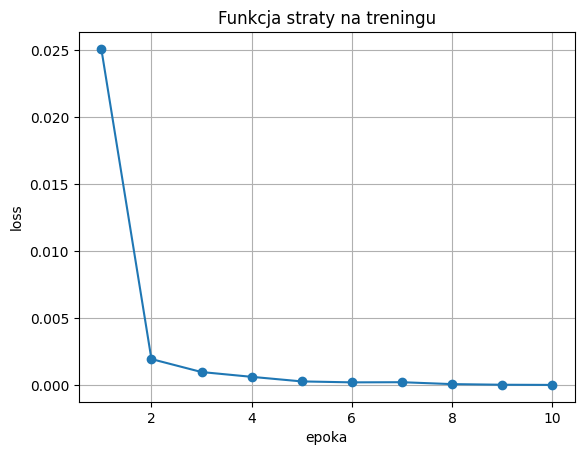

In [40]:
import matplotlib.pyplot as plt
# wykres funkcji straty
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("Funkcja straty na treningu")
plt.xlabel("epoka")
plt.ylabel("loss")
plt.grid(True)
plt.show()

In [41]:
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

correct = 0
total_loss = 0.0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == y_batch).sum().item()

test_accuracy = correct / len(test_loader.dataset)
avg_loss = total_loss / len(test_loader)

print(f"acc na zbiorze testowym: {test_accuracy * 100:.2f}%")
print(f"średnia strata na zbiorze testowym: {avg_loss:.4f}")


acc na zbiorze testowym: 99.99%
średnia strata na zbiorze testowym: 0.0001


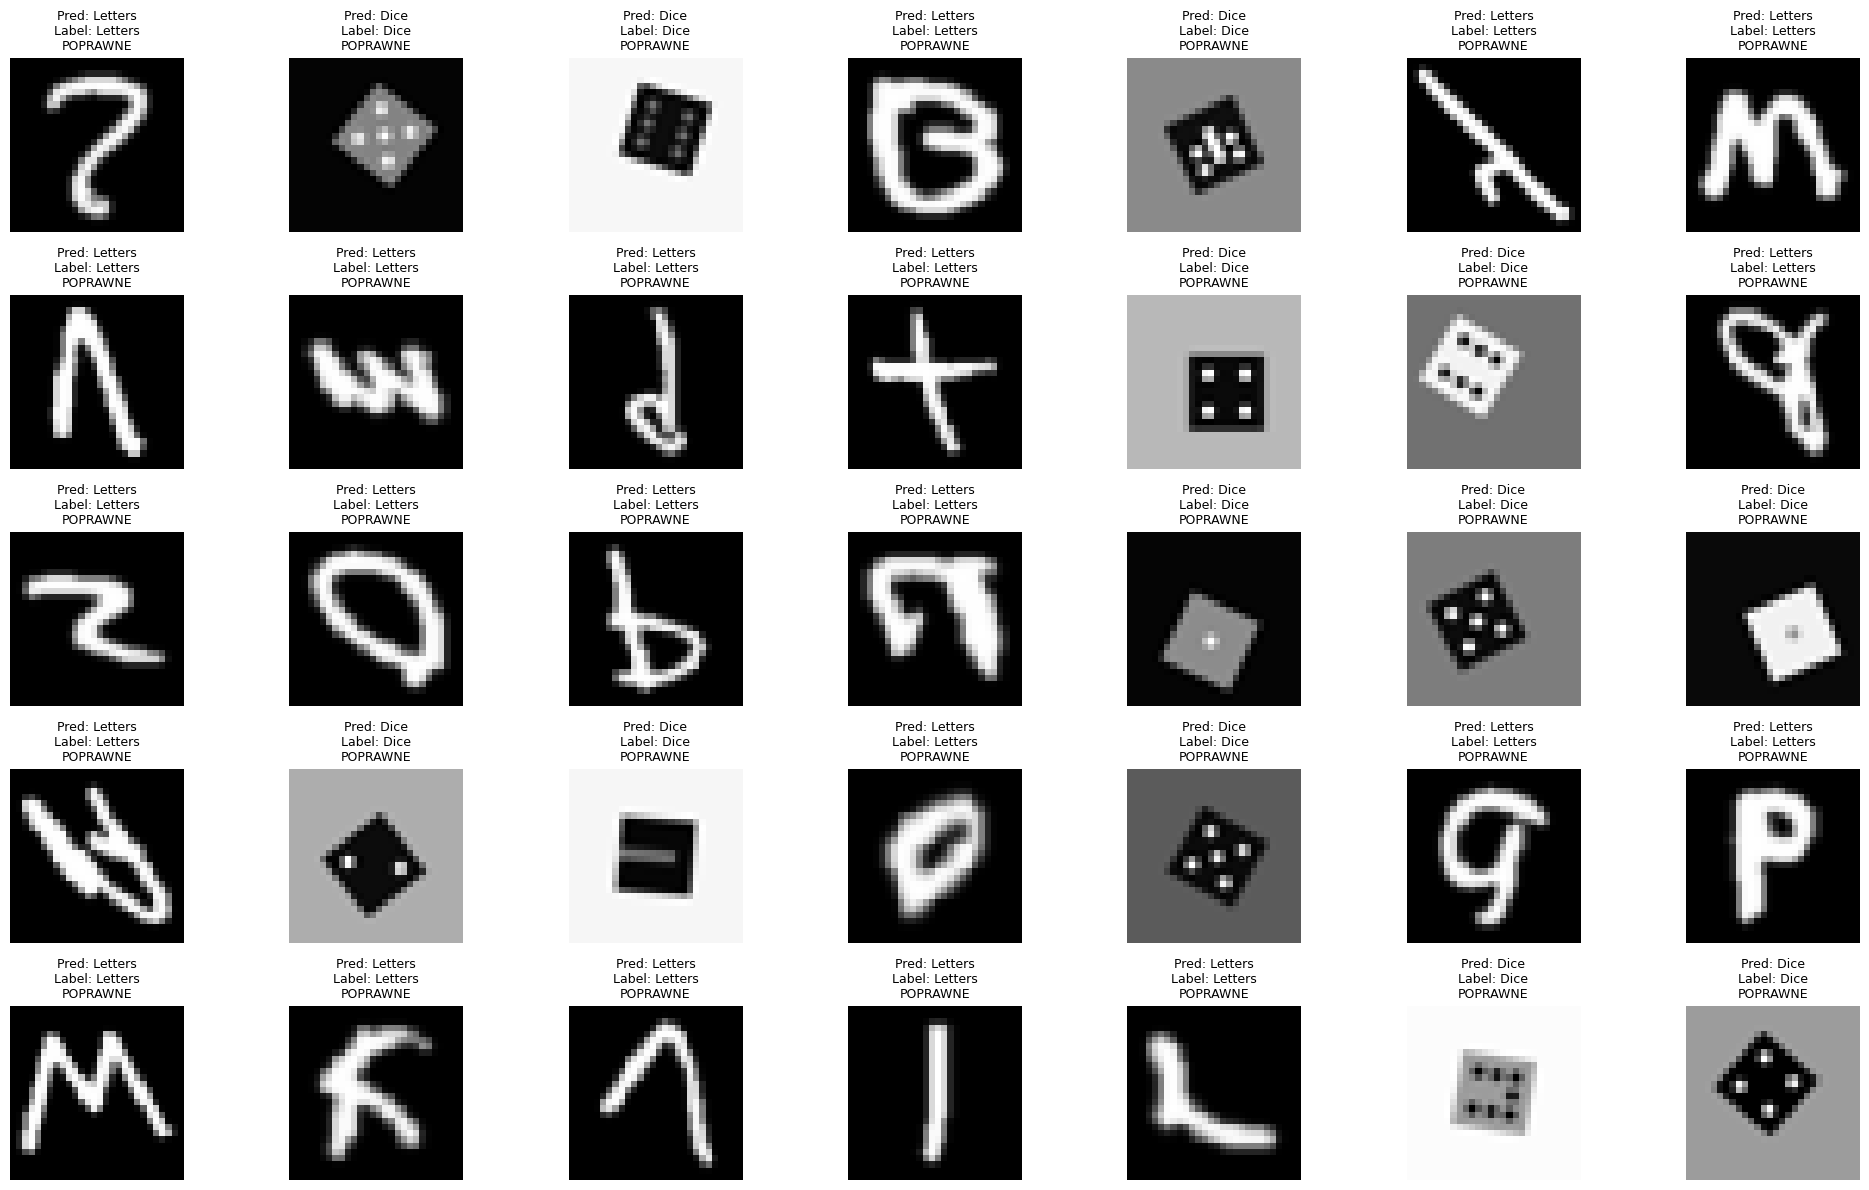

In [45]:
import matplotlib.pyplot as plt
import random

n_images = 35
rows = 5
cols = 7
domain_labels = ['Dice', 'Letters']
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
axes = axes.flatten()

model.eval()

with torch.no_grad():
    random_indices = random.sample(range(len(test_dataset)), n_images)
    for i, index in enumerate(random_indices):
        x, y_true = test_dataset[index]  
        x_input = x.unsqueeze(0).to(device)

        output = model(x_input)
        y_pred = output.argmax(dim=1).item()
        # czy poprawne
        is_correct = (y_pred == y_true)

        axes[i].imshow(x.squeeze(0).cpu(), cmap='gray')
        axes[i].set_title(
            f"Pred: {domain_labels[y_pred]}\nLabel: {domain_labels[y_true]}\n{'POPRAWNE' if is_correct else 'NIEPOPRAWNE'}",
            fontsize=9
        )
        axes[i].axis('off')

plt.tight_layout()
plt.show()
